Model, hız ve direksiyon hızı girdilerini kabul eder. 
Bisiklet kinematiği denklemleri:
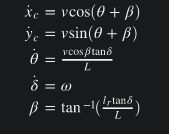

v: bisiklet hızı, w: direksiyon açı oranı delta: direksiyon açısı

Bisikletin başlangıç 0 konumundan başlar, maksimum 1.22 rad / s dönüş hızına, 2 m dingil mesafesi uzunluğuna ve arka akstan kütle merkezine kadar 1,2 m uzunluğa sahiptir.


In [11]:
from notebook_grader import BicycleSolution, grade_bicycle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class Bicycle():
    def __init__(self):
        self.xc = 0
        self.yc = 0
        self.theta = 0
        self.delta = 0
        self.beta = 0
        
        self.L = 2
        self.lr = 1.2
        self.w_max = 1.22
        
        self.sample_time = 0.01
        
    def reset(self):
        self.xc = 0
        self.yc = 0
        self.theta = 0
        self.delta = 0
        self.beta = 0

ModuleNotFoundError: No module named 'notebook_grader'

Kinematiği zamana yayarken sayısal entegrasyon için örnek bir zaman gereklidir. Bu, 10 milisaniyeye ayarlanmıştır. Ayrıca tüm durum değişkenlerini tekrar 0'a ayarlayan bir sıfırlama fonksiyonumuz var. 
Fonksiyon, girdi olarak hız + açısal oranı almalı ve durum değişkenlerini güncellemelidir.

In [12]:
class Bicycle(Bicycle):
    def step(self, v, w):
        if w > 0:
            w = min(w, self.w_max)
        else:
            w = max(w, -self.w_max)
        
        #sampling time
        t_sample = 10e-3
        
        #implementing the differential equations
        xc_dot = v * np.cos(self.theta + self.beta)
        yc_dot = v * np.sin(self.theta + self.beta)
        theta_dot = (v / self.L) * (np.cos(self.beta) * np.tan(self.delta))
        delta_dot = w
        self.beta = np.arctan(self.lr * np.tan(self.delta) / self.L)
        
        #update equations using the sampling time
        self.xc += xc_dot * t_sample
        self.yc += yc_dot * t_sample
        self.theta += theta_dot * t_sample 
        self.delta += delta_dot * t_sample

Model kurulumuyla artık bisiklet girdileri vermeye ve yörüngeler üretmeye başlayabiliriz.

Modelin 20 saniyede 10 m yarıçaplı bir daireyi hareket ettirmesini istediğimizi varsayalım. 
Eğrilik yarıçapı ile direksiyon açısı arasındaki ilişki kullanılarak istenen direksiyon açısı hesaplanabilir. 

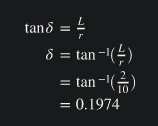

Direksiyon açısı, basitleştirilmiş bir bisikletli model kullanılarak doğrudan 0,1974'e ayarlanırsa, bisiklet herhangi bir ek direksiyon müdahalesi gerektirmeden bir daire içinde hareket edecektir. 
İstenilen hız, dairenin çevresinden hesaplanabilir: 

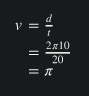



In [13]:
sample_time = 0.01
time_end = 20
model = Bicycle()
solution_model = BicycleSolution()

# set delta directly
model.delta = np.arctan(2/10)
solution_model.delta = np.arctan(2/10)

t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)
x_solution = np.zeros_like(t_data)
y_solution = np.zeros_like(t_data)

for i in range(t_data.shape[0]):
    x_data[i] = model.xc
    y_data[i] = model.yc
    model.step(np.pi, 0)
    
    x_solution[i] = solution_model.xc
    y_solution[i] = solution_model.yc
    solution_model.step(np.pi, 0)
    
#     model.beta = 0
#     solution_model.beta=0
    
plt.axis('equal')
plt.plot(x_data, y_data,label='Learner Model')
plt.plot(x_solution, y_solution,label='Solution Model')
plt.legend()
plt.show()

NameError: name 'BicycleSolution' is not defined

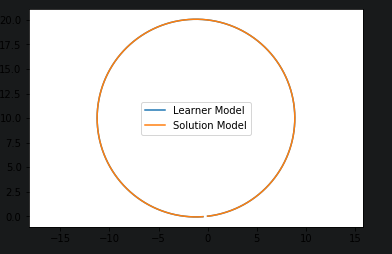

Yukarıdaki grafik, istenen 10m yarıçaplı daireyi göstermektedir. Yol biraz kaymış olup, bu durumdan kaynaklanan yan kayma etkilerinden kaynaklanır. $ \ beta $ . Zorlayarak $ \ beta = 0 $ döngüdeki son satırın açıklamasını kaldırarak, ofsetin kaybolduğunu ve dairenin (0,10) merkezli hale geldiğini görebilirsiniz.
Bununla birlikte, pratikte direksiyon açısı doğrudan ayarlanamaz ve açısal hız girişleri aracılığıyla değiştirilmelidir.

In [1]:
sample_time = 0.01
time_end = 20
model.reset()
solution_model.reset()

t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)
x_solution = np.zeros_like(t_data)
y_solution = np.zeros_like(t_data)

for i in range(t_data.shape[0]):
    x_data[i] = model.xc
    y_data[i] = model.yc
    
    if model.delta < np.arctan(2/10):
        model.step(np.pi, model.w_max)
    else:
        model.step(np.pi, 0)
        
    x_solution[i] = solution_model.xc
    y_solution[i] = solution_model.yc
    
    if solution_model.delta < np.arctan(2/10):
        solution_model.step(np.pi, model.w_max)
    else:
        solution_model.step(np.pi, 0)    

plt.axis('equal')
plt.plot(x_data, y_data,label='Learner Model')
plt.plot(x_solution, y_solution,label='Solution Model')
plt.legend()
plt.show()

NameError: name 'model' is not defined

In [2]:
sample_time = 0.01
time_end = 60
model.reset()
solution_model.reset()

t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)
x_solution = np.zeros_like(t_data)
y_solution = np.zeros_like(t_data)

# maintain velocity at 4 m/s
v_data = np.zeros_like(t_data)
v_data[:] = 4 

w_data = np.zeros_like(t_data)

# ==================================
#  Square Path: set w at corners only
# ==================================
w_data[670:670+100] = 0.753
w_data[670+100:670+100*2] = -0.753
w_data[2210:2210+100] = 0.753
w_data[2210+100:2210+100*2] = -0.753
w_data[3670:3670+100] = 0.753
w_data[3670+100:3670+100*2] = -0.753
w_data[5220:5220+100] = 0.753
w_data[5220+100:5220+100*2] = -0.753

# ==================================
#  Spiral Path: high positive w, then small negative w
# ==================================
# w_data[:] = -1/100
# w_data[0:100] = 1

# ==================================
#  Wave Path: square wave w input
# ==================================
#w_data[:] = 0
#w_data[0:100] = 1
#w_data[100:300] = -1
#w_data[300:500] = 1
#w_data[500:5700] = np.tile(w_data[100:500], 13)
#w_data[5700:] = -1

# ==================================
#  Step through bicycle model
# ==================================
for i in range(t_data.shape[0]):
    x_data[i] = model.xc
    y_data[i] = model.yc
    model.step(v_data[i], w_data[i])

    x_solution[i] = solution_model.xc
    y_solution[i] = solution_model.yc
    solution_model.step(v_data[i], w_data[i])
    
plt.axis('equal')
plt.plot(x_data, y_data,label='Learner Model')
plt.plot(x_solution, y_solution,label='Solution Model')
plt.legend()
plt.show()

NameError: name 'model' is not defined

Diğer alanları görüntülemek için bölümlerin açıklamalarını kaldırabilirsiniz.


Şimdi bisikletin sekiz rakamı şeklinde bir yörüngede seyahat etmesini istiyoruz. Şekildeki her iki dairenin de 8m'lik bir yarıçapı vardır ve yol 30 saniyede tamamlanmalıdır. Yol, sol dairenin altından başlar ve aşağıdaki şekilde gösterilir: 

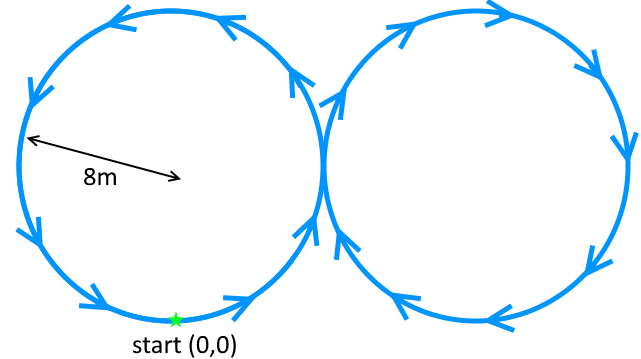

Bu tür bir yörünge oluşturmak için gereken hız ve direksiyon oranı girdilerini aşağıdaki hücrededir. Ayrıca girdilerinizi v_data ve w_data dizilerine kaydedilmiştir, bunlar çözümü derecelendirmek için kullanılacaktır. 

In [4]:
sample_time = 0.01
time_end = 30
model.reset()

t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)
v_data = np.zeros_like(t_data)
w_data = np.zeros_like(t_data)

# ==================================
#  Learner solution begins here
# ==================================
radius = 8
delta = 0.993 * np.arctan(model.L / radius)  #multiplied by 0.993 only for better accuracy
v_data[:] = (2 * np.pi * 2 * radius) / (time_end)

for i in range(t_data.shape[0]):
    x_data[i] = model.xc
    y_data[i] = model.yc
    
    #Since the velocity is constant we can divide the path into 8 slices
    #w changes at t_data.shape[0]/8, (5*t_data.shape[0])/8.
    if i <= t_data.shape[0]/8:
        if model.delta < delta:
            model.step(v_data[i], model.w_max)
            w_data[i] = model.w_max
        else:
            model.step(v_data[i], 0)
            w_data[i] = 0
            
    elif i <= (5.1*t_data.shape[0])/8:
        if model.delta > -delta:
            model.step(v_data[i], -model.w_max)
            w_data[i] = -model.w_max
        else:
            model.step(v_data[i], 0)
            w_data[i] = 0
            
    else:
        if model.delta < delta:
            model.step(v_data[i], model.w_max)
            w_data[i] = model.w_max
        else:
            model.step(v_data[i], 0)
            w_data[i] = 0   
# ==================================
#  Learner solution ends here
# ==================================
plt.axis('equal')
plt.plot(x_data, y_data)
plt.show()

NameError: name 'model' is not defined

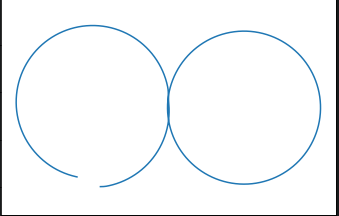

Şimdi hız ve açısal oran girişlerini bisiklet modeli çözümüyle çalıştıracağız. Bu, modeller birlikte yörüngenin doğru olmasını sağlamak içindir. Aşağıdaki hücre, modelimiz tarafından oluşturulan yolu ve bazı geçiş noktalarını istenen sekiz şeklinde gösterecektir. Bu geçiş noktalarını çevreleyen 1.5 m yarıçaplı hata tolerans çemberleridir; çözüm, oluşturulan yörünge bu çemberlerin %80'i içinde kalmalıdır.

In [5]:
grade_bicycle(t_data,v_data,w_data)

NameError: name 'grade_bicycle' is not defined

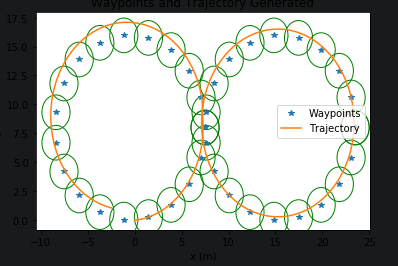

Courseradaki ilgili bölüm tamamlandı